# 1. Unsupervised learning
Unsupervised learning process flow is similar to supervised learning. We can train a model and use it to predict the unknown data set, however the key difference is that there is no predifined category or labels available for target variable, and the goal often is to create category or label based on patterns available in data. Unsupervised learning is used in clustering and dimensionality reduction.

## 1.1. Clustering
Key objective is to identify distinct groups (clusters) based on some notion of similarity within a given dataset.

The most popular clustering techniques are:
- K-means clustering (divisive).
- Hierarchical clustering (agglomerative).

## Exercise 1: K-means clustering
Let's load the Iris data and assume for a moment that the species column is missing i.e., we have the measured values for sepal length/width and petal length/width but we do not know how many species exists. Now let's use unsupervised learning i.e., clustering to find out how many species exists. The goal here is to group all similar items into a cluster.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

# Let's convert to dataframe (np.c_ - translates slice objects to concatenation along the second axis)
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['species'])

# Let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ', '')
iris.head()

X = iris.iloc[:, :3]  # Independent variables
y = iris.species      # Dependent variable
y = y.astype(np.int64)

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [2]:
# K-means clustering
model = KMeans(n_clusters = 3, random_state = 11)
model.fit(X)
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


**Questions:**
1. What are limitations of the K-means method and which of them had to be met during model construction?
2. How do you interpret the numbers 0, 1 and 2 displayed above?

**Answers:**

In [3]:
# Since it is unsupervised the labels have been assigned not in line with the actual lables,
# so let's convert all the 1s to 2s and 2s to 1s, 0's look fine.
iris['pred_species'] =  np.choose(model.labels_, [0, 2, 1]).astype(np.int64)

print('Accuracy:', metrics.accuracy_score(iris.species, iris.pred_species))
print('Classification report:\n', metrics.classification_report(iris.species, iris.pred_species))

Accuracy: 0.8066666666666666
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         1.0       0.71      0.70      0.71        50
         2.0       0.71      0.74      0.73        50

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



**Questions:**
1. Before further proceeding, the labels of the grouped observations  have been changed to match the actual labels. Why was it done?
2. Which Iris species have been grouped with the highest accuracy and which with the least accuracy? Justify your answer.

**Answers:**

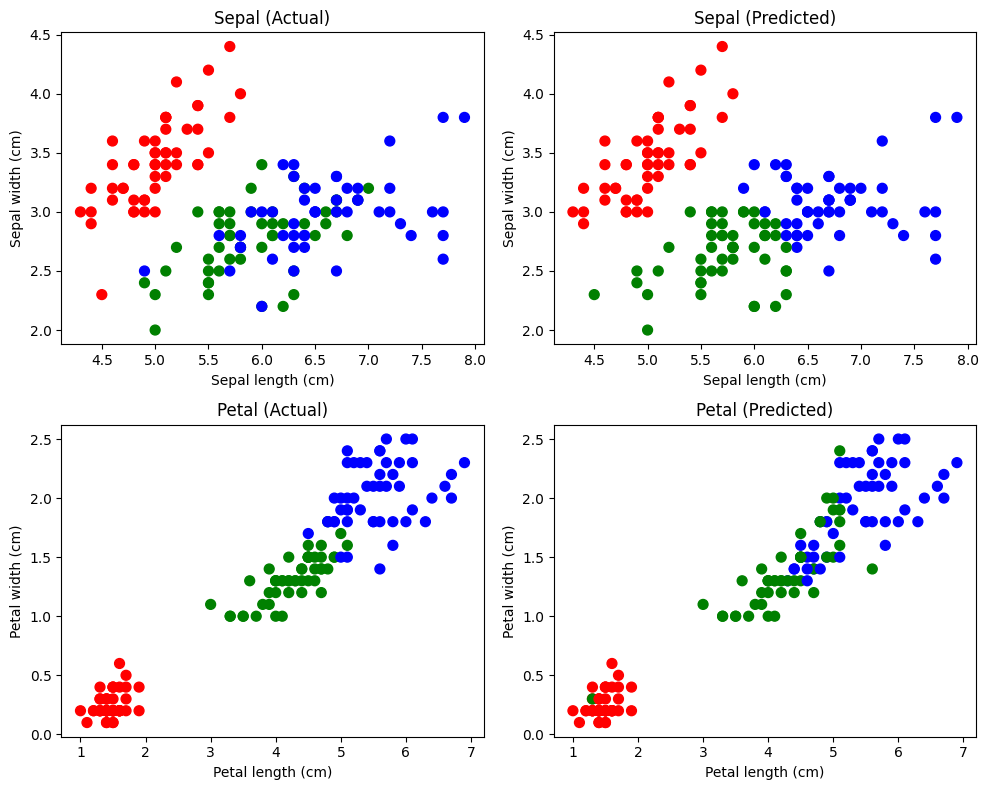

In [4]:
# Set the size of the plot
plt.figure(figsize = (10, 8))

# Create a colormap for red, green and blue
cmap = ListedColormap(['r', 'g', 'b'])

# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c = cmap(y), marker = 'o', s = 50)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal (Actual)')

plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c = cmap(iris.pred_species), marker = 'o', s = 50)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal (Predicted)')

# Plot Petal
plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c = cmap(y), marker = 'o', s = 50)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c = cmap(iris.pred_species), marker = 'o', s = 50)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()
plt.show()

**Questions:**
1. Which Iris species correspond to which colors in the above scatter plots?
2. Which clustering provides higher accuracy - based on the petal features or on the sepal features? Why do you think so?
3. Specify ranges of feature values (in cm) that provide the best clustering.

**Answers:**

## Exercise 2: Finding value of K

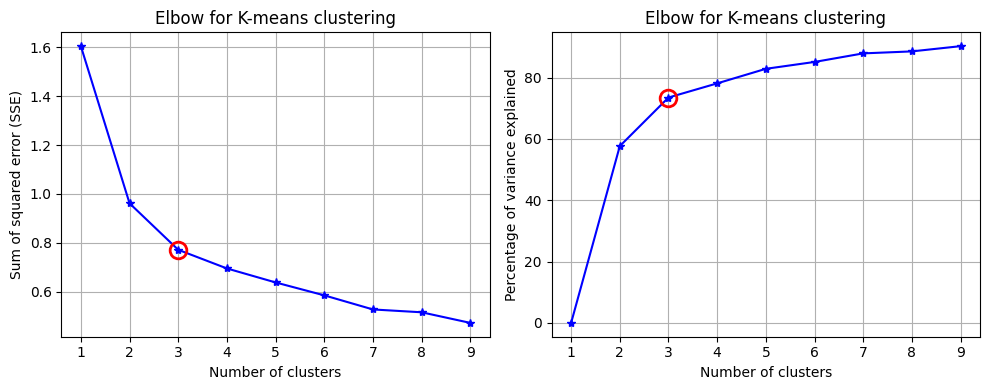

In [5]:
import warnings
warnings.filterwarnings('ignore')
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1, 10)
KM = [KMeans(n_clusters = k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis = 1) for D in D_k]
dist = [np.min(D, axis = 1) for D in D_k]
avgWithinSS = [sum(d) / X.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2) / X.shape[0]
bss = tss - wcss
varExplained = bss / tss*100

# Set the size of the plot
plt.figure(figsize = (10, 4))
elbowIndex = 2

plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[elbowIndex], avgWithinSS[elbowIndex], marker = 'o', markersize = 12, markeredgewidth = 2,
         markeredgecolor = 'r', markerfacecolor = 'None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error (SSE)')
plt.title('Elbow for K-means clustering')

plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[elbowIndex], varExplained[elbowIndex], marker = 'o', markersize = 12,
    markeredgewidth = 2, markeredgecolor = 'r', markerfacecolor = 'None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for K-means clustering')
plt.tight_layout()

**Questions:**
1. What number of clusters was considered optimal by the elbow method and why?
2. What is a sum of squared error and a percentage of variance explained for the optimal number of clusters?

**Answers:**

## Exercise 3: Hierarchical clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative cluster
#model = AgglomerativeClustering(n_clusters = 2)
model = AgglomerativeClustering(n_clusters = 3)
#model = AgglomerativeClustering(n_clusters = 4)

model.fit(X)

print(model.labels_)
iris['pred_species'] =  model.labels_

print('Accuracy:', metrics.accuracy_score(iris.species, iris.pred_species))
print('Classification report:\n', metrics.classification_report(iris.species, iris.pred_species))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy: 0.7733333333333333
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         1.0       0.64      0.74      0.69        50
         2.0       0.70      0.60      0.65        50

    accuracy                           0.77       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.78      0.77      0.77       150



**Questions:**
1. Perform clustering for different number of groups (2, 3, 4). In which case can you get the highest accuracy?
2. What is a difference between clustering using the K-means method and agglomerative method?

**Answers:**

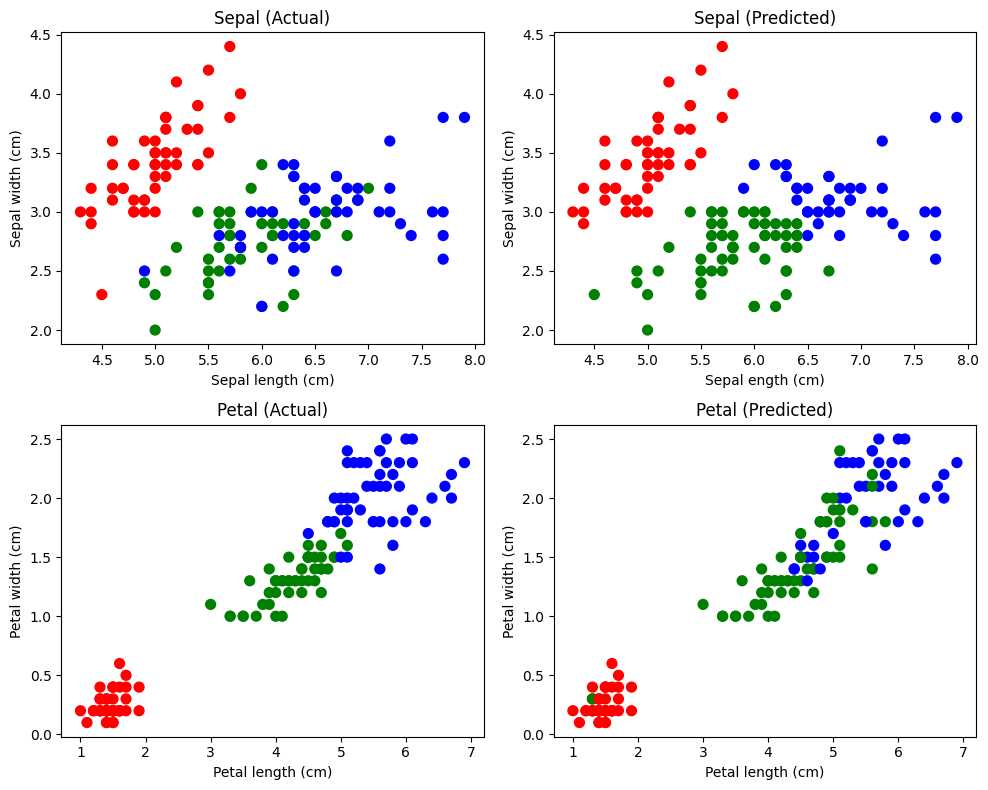

In [11]:
# Set the size of the plot
plt.figure(figsize = (10, 8))

# Create a colormap for red, green and blue
cmap = ListedColormap(['r', 'g', 'b'])

# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c = cmap(y), marker = 'o', s = 50)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal (Actual)')

plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c = cmap(iris.pred_species), marker = 'o', s = 50)
plt.xlabel('Sepal ength (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal (Predicted)')

# Plot Petal
plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c = cmap(y), marker = 'o', s = 50)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c = cmap(iris.pred_species), marker = 'o', s = 50)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()

**Question:**
1. Compare the scatter plots obtained as a result of the agglomerative and K-means method. What are the similarities and differences?

**Answer:**

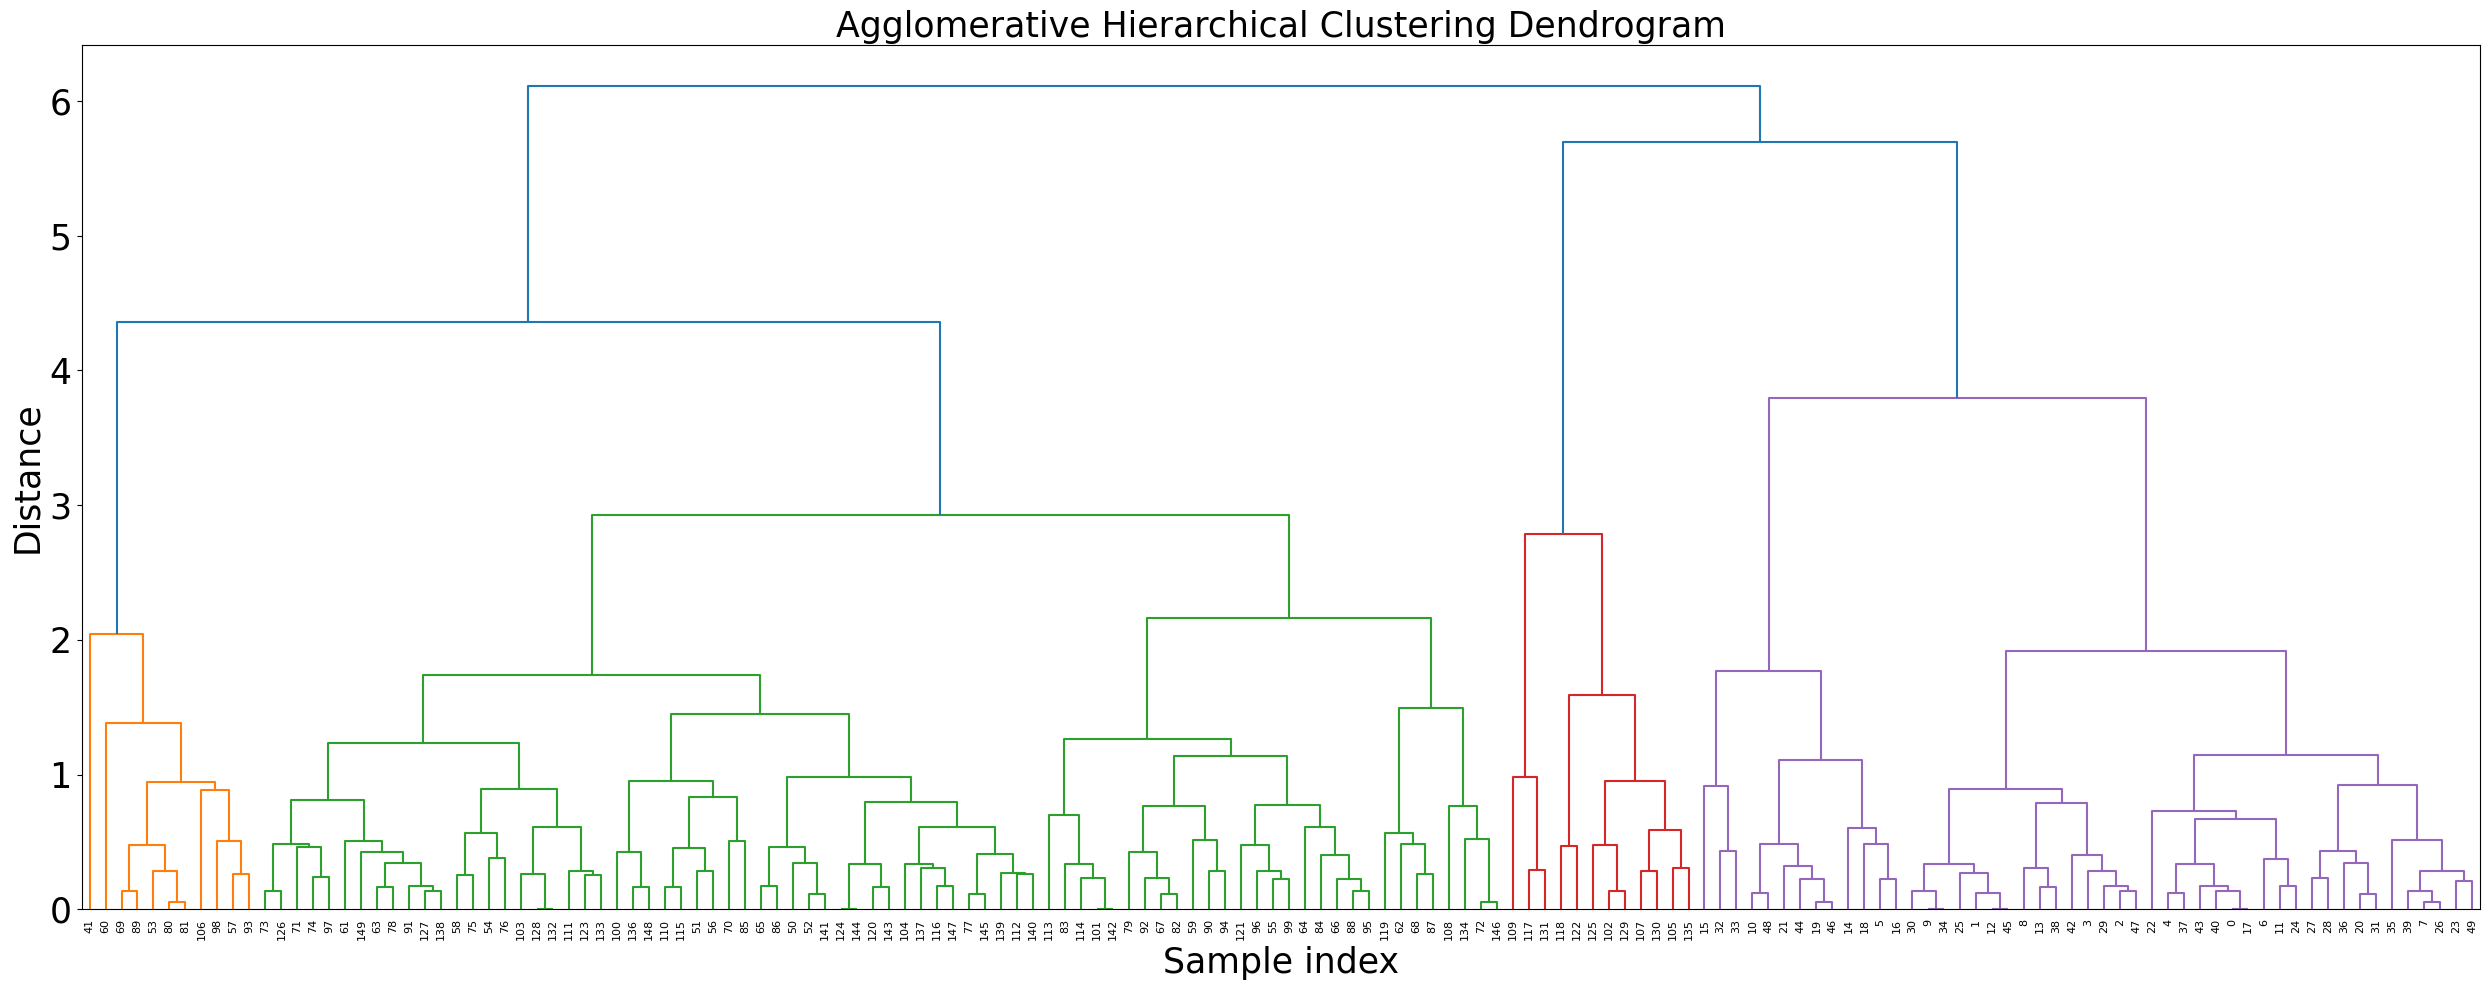

In [15]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

# Generate the linkage matrix
#Z = linkage(X, 'ward')
Z = linkage(X, 'complete')
#Z = linkage(X, 'average')
c, coph_dists = cophenet(Z, pdist(X))

# Calculate full dendrogram
plt.figure(figsize = (25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram', fontsize = 25)
plt.xlabel('Sample index', fontsize = 25)
plt.ylabel('Distance', fontsize = 25)
plt.yticks(fontsize = 25)
dendrogram(
    Z,
    leaf_rotation = 90.,  # Rotates the x axis labels
    leaf_font_size = 8.,  # Font size for the x axis labels
)
plt.tight_layout()

**Questions:**
1. What informations can you get from the dendrogram chart?
2. Compare the results obtained applying 3 different linkage parameters. Which parameter is best in your opinion and why?
3. What distance value should be used for each linkage parameter in order to achieve optimal clustering?

**Answers:**

## 1.2. Dimensionality reduction
Existence of a large number of features (dimensions) makes analysis computationally intensive and hard for performing machine learning tasks for pattern identification.

## Exercise 4: Principal Component Analysis (PCA)
PCA is the most popular unsupervised linear transformation technique for dimensionality reduction.

### Load data

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

### Standardize data

In [17]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### Perform eigen decomposition

In [18]:
# Eigen decomposition on covariance matrix

# Create covariance matrix
cov_mat = np.cov(X_std.T)
print('Covariance matrix \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('\nEigen vectors \n%s' %eig_vecs)
print('\nEigen values \n%s' %eig_vals)

Covariance matrix 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Eigen vectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigen values 
[2.93808505 0.9201649  0.14774182 0.02085386]


### Sort the eigen pairs

In [19]:
# Sort eigen values in decreasing order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

print('Eigen values in descending order:')
for i in eig_pairs:
    print(i[0])

Eigen values in descending order:
2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


### Plot principal components vs explained variance

Cummulative Variance Explained [ 72.96244541  95.8132072   99.48212909 100.        ]


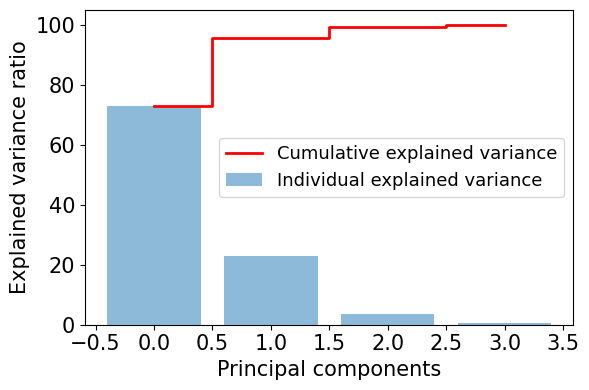

In [20]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
print('Cummulative Variance Explained', cum_var_exp)

plt.figure(figsize = (6, 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where = 'mid', lw = 2, color = 'red', label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize = 15)
plt.xlabel('Principal components', fontsize = 15)
plt.legend(loc = 'best', fontsize = 13)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

In the above plot we can see that first 3 principal components are explaining 99% of the variance.

### Perform the PCA using sklearn library and plot the 1st 3 eigen vectors

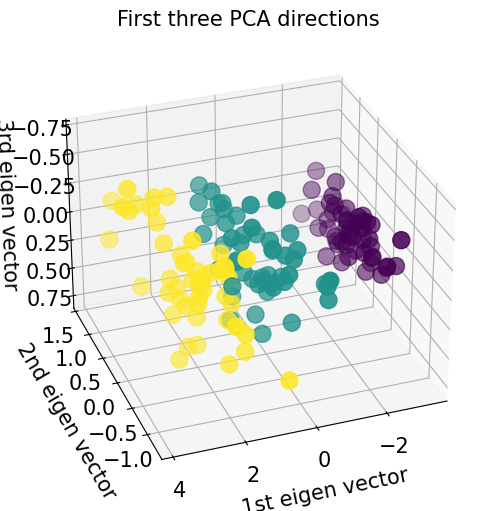

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Import some data to play with
iris = datasets.load_iris()
Y = iris.target

# To get a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize = (8, 6))
ax = fig.add_subplot(111, elev = -150, azim = 110, projection='3d')
ax.tick_params(labelsize = 15)

X_reduced = PCA(n_components = 3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c = Y, s = 150)
ax.set_title('First three PCA directions', fontsize = 15)
ax.set_xlabel('\n1st eigen vector', fontsize = 15)
ax.set_ylabel('\n2nd eigen vector', fontsize = 15)
ax.set_zlabel('\n3rd eigen vector', fontsize = 15)
plt.show()

**Questions:**
1. Why was the data standardization operation performed?
2. What is a meaning of the eigen vectors and eigen values?
3. How many principal components would be sufficient to explain at least 90% of the variance?
4. Which eigen vector best divides observations into 3 clusters? Justify your answer.
5. What is the dimensionality reduction by means of the principal component analysis?

**Answers:**